In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# create Naive Bayes model and fit to training data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [4]:
# make predictions on test data
y_pred = nb_model.predict(X_test)

In [5]:
# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Naive Bayes Accuracy: {:.2f}%'.format(accuracy * 100))


Naive Bayes Accuracy: 81.00%


In [6]:
import matplotlib.pyplot as plt

In [11]:
from sklearn.metrics import(
confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,RocCurveDisplay,classification_report)

In [12]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n ",cm)


Confusion Matrix:
  [[77 12]
 [26 85]]


In [13]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)

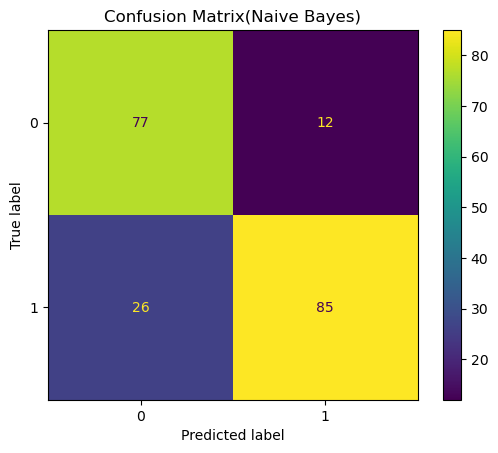

In [26]:
disp.plot()
plt.title("Confusion Matrix(Naive Bayes)")
plt.show()

In [16]:
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f"Precision:{precision:3f}")
print(f"Recall:{recall:3f}")
print(f"F1_score:{f1:3f}")


Precision:0.876289
Recall:0.765766
F1_score:0.817308


In [17]:
print("\nClassification Report:\n",classification_report(y_test,y_pred,digits=3))


Classification Report:
               precision    recall  f1-score   support

           0      0.748     0.865     0.802        89
           1      0.876     0.766     0.817       111

    accuracy                          0.810       200
   macro avg      0.812     0.815     0.810       200
weighted avg      0.819     0.810     0.811       200



In [20]:
y_scores=nb_model.predict_proba(X_test)[:,1]

In [21]:
fpr,tpr,thresholds=roc_curve(y_test,y_scores)

In [22]:
auc=roc_auc_score(y_test,y_scores)

In [23]:
print(f"AUC:{auc:.3f}")

AUC:0.887


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


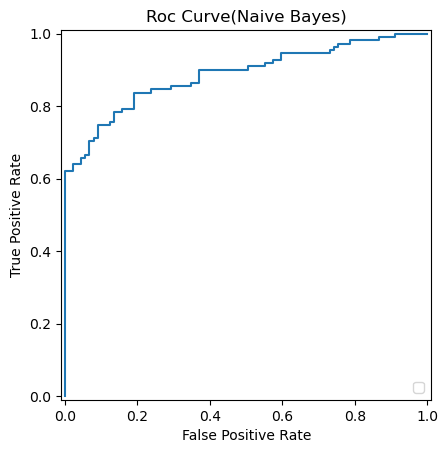

In [25]:
RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title("Roc Curve(Naive Bayes)")
plt.show()